In [1]:
from numpy import random

import numpy as np
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
random.seed(69)
datasize = random.randint(1000,10000)
print("Datasize = ",datasize)



print("\nFor feature X1 ")


cen = random.uniform(0,10)
print("Center1 = ",cen)
sd = random.uniform(0,10)
print("St. Dev1 = ", sd)


#x = random.uniform(0,10)
#data = rng.multivariate_normal((0,0), cov = ((1,0),(3,4)), size = 15, check_valid='ignore')
data1 = random.normal(loc = cen, scale = sd, size = datasize)
print("Mean = ",data1.mean())
print("Var = ", data1.var())
print("Std Dev = ", data1.std())
#print(data1)


print("\nFor feature X2 ")


cen = random.uniform(0,10)
print("Center2 = ",cen)
sd = random.uniform(0,10)
print("St. Dev2 = ", sd)
data2 = random.normal(loc = cen, scale = sd, size = datasize)
print("Mean = ",data2.mean())
print("Var = ", data2.var())
print("Std Dev = ", data2.std())


print("\nFor feature X3 ")


r1 = random.randint(0,100)
r2 = random.randint(0,100)
cen = random.uniform(0, r1)
sd = random.uniform(0, r2)
print("Center3 = ",cen, " St. Dev3 = ",sd)

#1000, ((1, 0), (3, 4)), (3, 4)

data3 = random.normal(loc = cen, scale = sd, size = datasize)
print("Mean = ",data3.mean())
print("Var = ", data3.var())
print("Std Dev = ", data3.std())



print("\nFor Noise variable ")

cen = random.uniform(0,10)
print("Center2 = ",cen)
sd = random.uniform(0,10)
print("St. Dev2 = ", sd)
noise = random.normal(loc = cen, scale = sd, size = datasize)

print("Mean = ",noise.mean())
print("Var = ", noise.var())
print("Std Dev = ", noise.std())


tar = data1 * random.uniform(0,r1) + data2 * random.uniform(0,r2) + data3 * random.uniform(-10, 10) + noise

Datasize =  8371

For feature X1 
Center1 =  8.090677156733268
St. Dev1 =  3.5025252522341144
Mean =  8.009078354606547
Var =  12.148049488928466
Std Dev =  3.485405211582789

For feature X2 
Center2 =  5.039932774190819
St. Dev2 =  0.9317725852132741
Mean =  5.034318667182973
Var =  0.846234642547564
Std Dev =  0.9199101274296114

For feature X3 
Center3 =  12.310125626102696  St. Dev3 =  41.1279055063229
Mean =  12.494092721369618
Var =  1686.977205700616
Std Dev =  41.07282807039973

For Noise variable 
Center2 =  8.513705681224685
St. Dev2 =  3.114745663526831
Mean =  8.494699973054841
Var =  9.65254466542108
Std Dev =  3.106854464795717


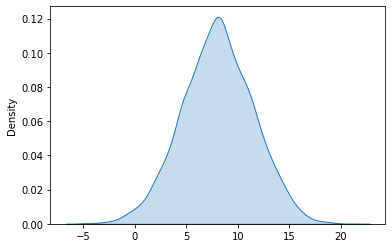

In [3]:
sns.kdeplot(data1, shade = True)#, hist=False)
plt.show()


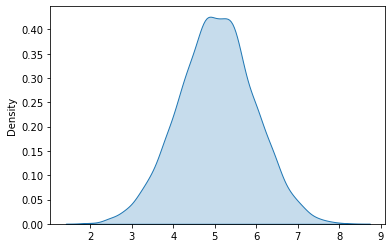

In [4]:
sns.kdeplot(data2, shade = True)#, hist=False)
plt.show()

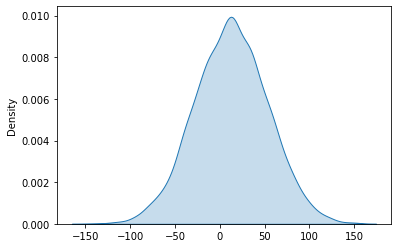

In [5]:
sns.kdeplot(data3, shade = True)#, hist=False)
plt.show()

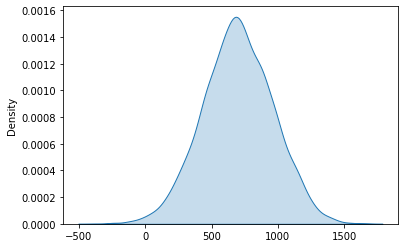

In [6]:
sns.kdeplot(tar, shade = True)
plt.show()

In [7]:

features = np.vstack([data1,data2,data3]).transpose()
#print(X.head)
print(features.dtype)
print(features[:10])

target= np.vstack([tar]).transpose()
print(target.dtype)
print(target[:10])




float64
[[  9.14301131   4.96469681   7.7133153 ]
 [ 13.05498569   4.48851739  38.40766689]
 [  6.50328775   3.03616128  11.10559629]
 [  7.10048072   6.03124741  84.94080984]
 [  8.67823852   4.65615826  42.74458519]
 [  6.59360373   5.66333428  83.84540141]
 [ 11.83739619   5.00532148 -12.08246769]
 [ 11.27480781   5.14443317  -0.37056437]
 [ 12.05479949   4.37413298   1.41714348]
 [  5.09206048   5.53585185  14.70785923]]
float64
[[ 778.69801863]
 [1108.35993005]
 [ 552.49021978]
 [ 734.80876208]
 [ 779.96776596]
 [ 686.02836711]
 [ 948.4102039 ]
 [ 928.88768049]
 [ 979.13572004]
 [ 490.57992591]]


In [8]:
X = pd.DataFrame(features, columns = ["X1", "X2", "X3"])
X.head()

,X1,X2,X3
0,9.143011,4.964697,7.713315
1,13.054986,4.488517,38.407667
2,6.503288,3.036161,11.105596
3,7.100481,6.031247,84.940810
4,8.678239,4.656158,42.744585


In [9]:
y = pd.DataFrame(target, columns = ["Y"])
y.head()

,Y
0,778.698019
1,1108.359930
2,552.490220
3,734.808762
4,779.967766


In [10]:

lreg = LinearRegression()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44)
lreg.fit(X_train, y_train)

y_pred = lreg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("MSE = ", mse)

r2 = r2_score(y_test, y_pred)
print("R2 score = ", r2)
print("Coefficients = ", lreg.coef_)
print("Intercept = ", lreg.intercept_)


#print(results)

MSE =  9.353048617542814
R2 score =  0.9998644340192505
Coefficients =  [[74.96842868 14.3114592   1.30836979]]
Intercept =  [8.31991729]


## Outliers

In [11]:
#adding outliers manually
temp = copy.deepcopy(X)
temp.head()


,X1,X2,X3
0,9.143011,4.964697,7.713315
1,13.054986,4.488517,38.407667
2,6.503288,3.036161,11.105596
3,7.100481,6.031247,84.940810
4,8.678239,4.656158,42.744585


In [12]:
temp1 = copy.deepcopy(y)
temp1.head()

,Y
0,778.698019
1,1108.359930
2,552.490220
3,734.808762
4,779.967766


In [13]:
X.head()
print(temp['X1'].max())
print(type(X))

21.108076680259153
<class 'pandas.core.frame.DataFrame'>


In [14]:

r = random.randint(100,1000)
print("Number of Outliers added ",r)
maxval1 = X['X1'].max()
maxval2 = X['X2'].max()
maxval3 = X['X3'].max()
c1 = c2 = c3 = 0
for i in range (r):
    col = random.randint(1,4)
    pos = random.randint(0, datasize)
    multval = random.uniform(1,3)

    if col == 1:
        X['X1'][pos] =  maxval1 * multval * pow(-1, random.randint(1,3)) # small outliers
        #print("X1 -> ", X['X1'][pos])
        c1 += 1
    elif col == 2:
        X['X2'][pos] = maxval2 * multval * pow(-1,random.randint(1,3)) 
        #print("X2 -> ", X['X2'][pos])
        c2 +=1
    elif col == 3:
        X['X3'][pos] = maxval3 * multval * pow(-1,random.randint(1,3)) #X['X3'][pos] *
        #print("X3 -> ", X['X3'][pos])
        c3 +=1
print("Outliers added column wise-> ",c1," ", c2," ", c3)


Number of Outliers added  648
Outliers added column wise->  226   212   210


<AxesSubplot:xlabel='X1'>

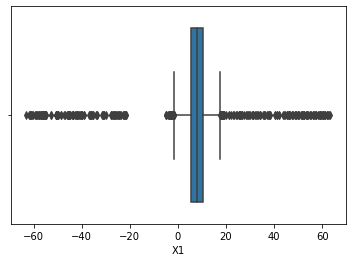

In [15]:
sns.boxplot(x = X['X1'])

<AxesSubplot:xlabel='X2'>

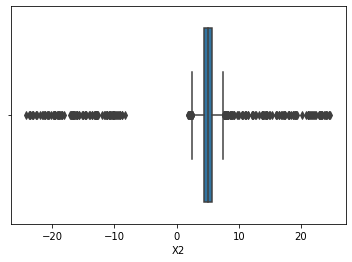

In [16]:
sns.boxplot(x = X['X2'])

<AxesSubplot:xlabel='X3'>

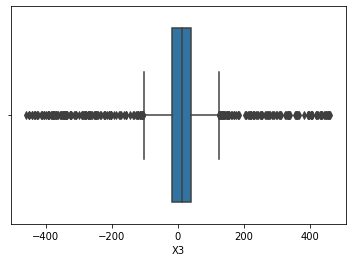

In [17]:
sns.boxplot(x = X['X3'])

In [18]:
print(X['X1'].max()," and ", X['X1'].min())
print(X['X2'].max()," and ", X['X2'].min())
print(X['X3'].max()," and ", X['X3'].min())

print(type(X))

63.30879066960792  and  -63.15763555266817
24.725466896421  and  -24.229963930383942
462.64232078135313  and  -460.39829562352435
<class 'pandas.core.frame.DataFrame'>


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44)
lreg.fit(X_train, y_train)

y_pred = lreg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("MSE = ", mse)

r2 = r2_score(y_test, y_pred)
print("R2 score = ", r2)
print("Coefficients = ", lreg.coef_)
print("Intercept = ", lreg.intercept_)



MSE =  56189.85206567238
R2 score =  0.18556689749648492
Coefficients =  [[13.21989427  1.94334513  0.49891397]]
Intercept =  [581.76700651]


In [20]:
def iqroutliers(X):
    pos = []
    for col in ('X1', 'X2', 'X3'):
        q1 = np.quantile(X[col], 0.25)
        print(q1)
        q3 = np.quantile(X[col], 0.75)
        print(q3)
        iqr = q3 - q1
        print(iqr)
        upperlim = q3 + 1.5 * iqr
        lowerlim = q1 - 1.5 * iqr
        print(upperlim, " and ", lowerlim)

        pos1 = np.where(X[col] >= upperlim)
        pos2 = np.where(X[col] <= lowerlim)
        #print(pos1)
        pos.append(list(pos1[0]))
        pos.append(list(pos2[0]))
        #np.append(pos,pos1[0])
        #np.append(pos,pos2[0])
    return pos


print(type(X))
pos = iqroutliers(X)
#print("\n",pos[0])
#print("\n",pos[1])
#print("\n",pos)
test = pd.DataFrame(pos[0])

print("\n",test)
print("len = ", len(pos))
for i in range (1,6):

    test = test.append(pd.DataFrame(pos[i]), ignore_index = True )
print("\n",test)
test.drop_duplicates(inplace = True)
print("After removing duplicates\n",test[0])

<class 'pandas.core.frame.DataFrame'>
5.6275324319833135
10.431283768186677
4.803751336203364
17.636910772491724  and  -1.5780945723217323
4.399464481634599
5.6611149067997495
1.2616504251651506
7.553590544547475  and  2.506988843886873
-16.25333722714008
40.456990510442914
56.71032773758299
125.5224821168174  and  -101.31882883351457

         0
0      66
1      83
2     192
3     266
4     297
..    ...
127  8200
128  8207
129  8229
130  8283
131  8296

[132 rows x 1 columns]
len =  6

         0
0      66
1      83
2     192
3     266
4     297
..    ...
779  8019
780  8046
781  8138
782  8150
783  8358

[784 rows x 1 columns]
After removing duplicates
 0        66
1        83
2       192
3       266
4       297
       ... 
778    7851
779    8019
781    8138
782    8150
783    8358
Name: 0, Length: 767, dtype: int64


In [21]:
print("X shape ", X.shape, " Y shape ", y.shape)
X.drop(test[0], inplace = True)
y.drop(test[0], inplace = True)
print("X shape ", X.shape, " Y shape ", y.shape)




X shape  (8371, 3)  Y shape  (8371, 1)
X shape  (7604, 3)  Y shape  (7604, 1)


<AxesSubplot:xlabel='X1'>

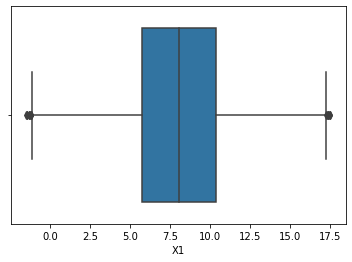

In [22]:
sns.boxplot(x = X['X1'])

<AxesSubplot:xlabel='X2'>

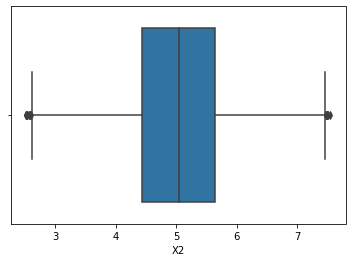

In [23]:
sns.boxplot(x = X['X2'])

<AxesSubplot:xlabel='X3'>

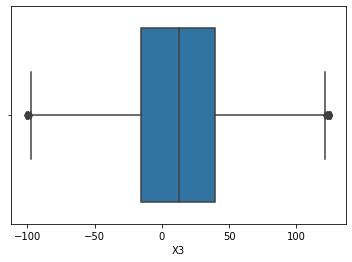

In [24]:
sns.boxplot(x = X['X3'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44)
lreg.fit(X_train, y_train)

y_pred = lreg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("MSE = ", mse)

r2 = r2_score(y_test, y_pred)
print("R2 score = ", r2)
print("Coefficients = ", lreg.coef_)
print("Intercept = ", lreg.intercept_)




MSE =  10.186786495395735
R2 score =  0.9998502181105389
Coefficients =  [[74.97161275 14.29427592  1.30838837]]
Intercept =  [8.37974583]


## Increasing magnitude of outliers

In [26]:
X = copy.deepcopy(temp)
y = copy.deepcopy(temp1)


r = random.randint(100,1000)
print("Number of Outliers added ",r)
maxval1 = X['X1'].max()
maxval2 = X['X2'].max()
maxval3 = X['X3'].max()
c1 = c2 = c3 = 0
for i in range (r):
    col = random.randint(1,4)
    pos = random.randint(0, datasize)
    multval = random.uniform(1,3)

    if col == 1:
        X['X1'][pos] = X['X1'][pos] * maxval1 * multval * pow(-1, random.randint(1,3)) #large magnitude outliers
        #print("X1 -> ", X['X1'][pos])
        c1 += 1
    elif col == 2:
        X['X2'][pos] = X['X2'][pos] * maxval1 * multval * pow(-1, random.randint(1,3)) 
        #print("X2 -> ", X['X2'][pos])
        c2 +=1
    elif col == 3:
        X['X3'][pos] = X['X3'][pos] * maxval1 * multval * pow(-1, random.randint(1,3)) 
        #print("X3 -> ", X['X3'][pos])
        c3 +=1
print("Outliers added column wise-> ",c1," ", c2," ", c3)




Number of Outliers added  633
Outliers added column wise->  218   191   224


In [27]:
print(X['X1'].max()," and ", X['X1'].min())
print(X['X2'].max()," and ", X['X2'].min())
print(X['X3'].max()," and ", X['X3'].min())

21735.48409565882  and  -948.4331630536909
5607.5318054396685  and  -9309.212894480448
7679.113085288171  and  -5555.506953950328


<AxesSubplot:xlabel='X1'>

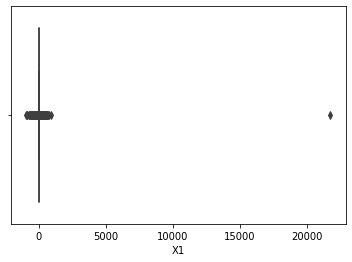

In [28]:
sns.boxplot(x = X['X1'])

<AxesSubplot:xlabel='X2'>

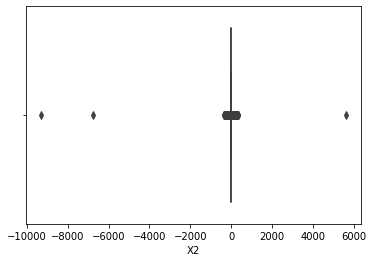

In [29]:
sns.boxplot(x = X['X2'])

<AxesSubplot:xlabel='X3'>

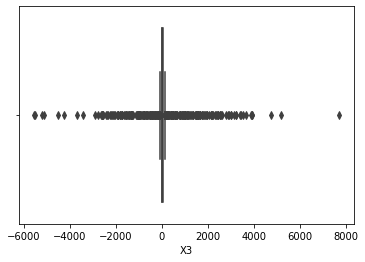

In [30]:
sns.boxplot(x = X['X3'])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44)
lreg.fit(X_train, y_train)

y_pred = lreg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("MSE = ", mse)

r2 = r2_score(y_test, y_pred)
print("R2 score = ", r2)
print("Coefficients = ", lreg.coef_)
print("Intercept = ", lreg.intercept_)




MSE =  69043.93052709813
R2 score =  -0.0007440931237983062
Coefficients =  [[0.02950635 0.01282053 0.01940793]]
Intercept =  [700.20081134]


In [32]:
print(type(X))
pos = iqroutliers(X)
#print("\n",pos[0])
#print("\n",pos[1])
#print("\n",pos)
test = pd.DataFrame(pos[0])

print("\n",test)
print("len = ", len(pos))
for i in range (1,6):

    test = test.append(pd.DataFrame(pos[i]), ignore_index = True )
print("\n",test)
test.drop_duplicates(inplace = True)
print("\n",test[0])

<class 'pandas.core.frame.DataFrame'>
5.623172883719876
10.44018824319637
4.817015359476494
17.665711282411113  and  -1.6023501554948654
4.4043211730715095
5.66179155124143
1.2574703781699208
7.547997118496312  and  2.5181156058166283
-16.077015725016466
40.80446326946422
56.88147899448069
126.12668176118525  and  -101.3992342167375

         0
0      66
1      94
2     174
3     197
4     211
..    ...
132  7952
133  8034
134  8065
135  8114
136  8242

[137 rows x 1 columns]
len =  6

         0
0      66
1      94
2     174
3     197
4     211
..    ...
761  8150
762  8195
763  8212
764  8315
765  8352

[766 rows x 1 columns]

 0        66
1        94
2       174
3       197
4       211
       ... 
761    8150
762    8195
763    8212
764    8315
765    8352
Name: 0, Length: 743, dtype: int64


In [33]:
print("X shape ", X.shape, " Y shape ", y.shape)
X.drop(test[0], inplace = True)
y.drop(test[0], inplace = True)
print("X shape ", X.shape, " Y shape ", y.shape)



X shape  (8371, 3)  Y shape  (8371, 1)
X shape  (7628, 3)  Y shape  (7628, 1)


<AxesSubplot:xlabel='X1'>

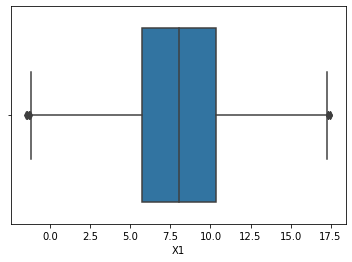

In [34]:
sns.boxplot(x = X['X1'])

<AxesSubplot:xlabel='X2'>

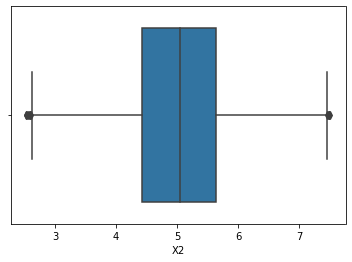

In [35]:
sns.boxplot(x = X['X2'])

<AxesSubplot:xlabel='X3'>

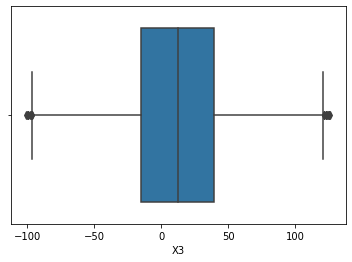

In [36]:
sns.boxplot(x = X['X3'])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44)
lreg.fit(X_train, y_train)

y_pred = lreg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("MSE = ", mse)

r2 = r2_score(y_test, y_pred)
print("R2 score = ", r2)
print("Coefficients = ", lreg.coef_)
print("Intercept = ", lreg.intercept_)



MSE =  22.89758821704841
R2 score =  0.9996576304779274
Coefficients =  [[74.98145665 14.26309545  1.3080676 ]]
Intercept =  [8.42489921]
